In [22]:
from reusedistance import ReuseDistance
import main
import numpy as np

In [23]:
class TracedHamiltonian(main.Hamiltonian):
    def __init__(self, *args, **kwargs):
        self.trace = ReuseDistance()
        self.distances = []
        super().__init__(*args, **kwargs)
        
    def H_two_e(self, i, j, k, l):
        d = self.trace.add_record((i,j,k,l))
        self.distances.append(d)
        return super().H_two_e(i,j,k,l)

In [24]:
fci_path = 'f2_631g.FCIDUMP'
wf_path = 'f2_631g.1det.wf'
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)
main.Powerplant(lewis, psi_det).E(psi_coef)

-198.64609674314374

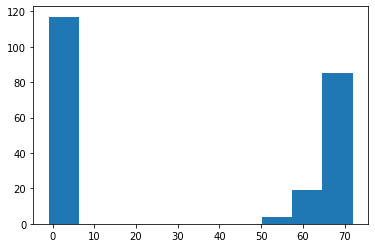

In [25]:
import matplotlib.pyplot as plt

plt.hist(lewis.distances)
plt.show()